<a href="https://colab.research.google.com/github/Ayushshah2023/InstagramFiltersUsingOpenCV/blob/main/Making_Instagram_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving testing.jpg to testing.jpg


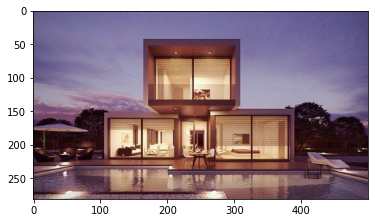

In [39]:
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['testing.jpg']))
#im1 = Image.open(BytesIO(uploaded['test2.jpg']))
plt.imshow(im)
plt.show()
#plt.imshow(im1)
#plt.show()

###**BLUR EFFECT**

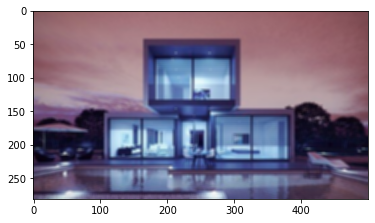

In [40]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread('testing.jpg')
dst = cv2.GaussianBlur(im,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(dst)
plt.show()

### **Edge Detection**

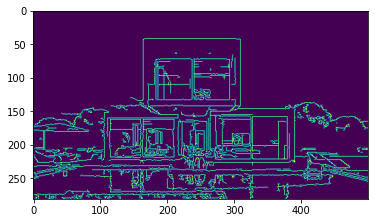

In [41]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread('testing.jpg')
edges = cv2.Canny(im,100,300)
plt.imshow(edges)
plt.show()

### **Vintage Filter**

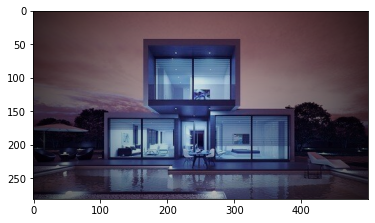

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
im = cv2.imread('testing.jpg')
rows, cols = im.shape[:2]
# Create a Gaussian filter
kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_y * kernel_x.T
filter = 255 * kernel / np.linalg.norm(kernel)
vintage_im = np.copy(im)
# for each channel in the input image, we will apply the above filter
for i in range(3):
    vintage_im[:,:,i] = vintage_im[:,:,i] * filter
plt.imshow(vintage_im)
plt.show()

### **SEPIA FILTER**

In [43]:
def sepia(image):
    kernel = np.array([[0.272, 0.534, 0.131],
                       [0.349, 0.686, 0.168],
                       [0.393, 0.769, 0.189]])
    return cv2.filter2D(image, -1, kernel)

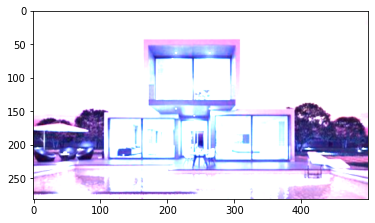

In [44]:
#im = Image.open(BytesIO(uploaded['test3.jpg']))
sepia_image = sepia(im)
plt.imshow(sepia_image)
plt.show()

### **BLUR FILTER-Method 2**

In [45]:
def gaussianBlur(image):
    return cv2.GaussianBlur(image, (35, 35), 0)

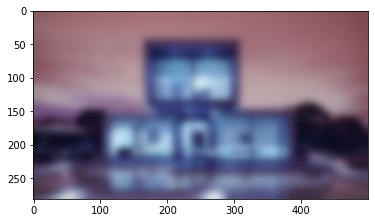

In [46]:
gauss_image = gaussianBlur(im)
plt.imshow(gauss_image)
plt.show()

### **Emboss Filter**

In [47]:
def emboss(image):
    kernel = np.array([[0,-1,-1],[1,0,-1],[1,1,0]])
    return cv2.filter2D(image, -1, kernel)

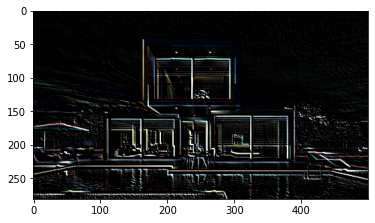

In [48]:
emboss_image = emboss(im)
plt.imshow(emboss_image)
plt.show()

Now we try to some of the implement top 9 Instagram Filters of 2019:

Source: https://blog.hubspot.com/marketing/instagram-filters

Clarendon

Gotham

Lily

1977

Walden

Sierra

There is a python libraries to implement them:

Valencia

Nashville

Gingham

### **Clarendon Filter**

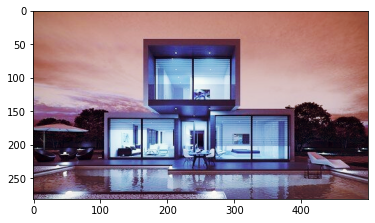

In [ ]:
import cv2
import sys
import numpy as np
image=cv2.imread("test2.jpg")
clarendon = image.copy()
#Split the image into R,G,B
blueChannel, greenChannel, redChannel = cv2.split(clarendon)
originalValues = np.array([0, 28, 56, 85, 113, 141, 170, 198, 227, 255])
blueValues =     np.array([0, 38, 66, 104, 139, 175, 206, 226, 245, 255 ])
redValues =      np.array([0, 16, 35, 64, 117, 163, 200, 222, 237, 249 ])
greenValues =    np.array([0, 24, 49, 98, 141, 174, 201, 223, 239, 255 ])
fullRange = np.arange(0,256)
blueLookupTable = np.interp(fullRange, originalValues, blueValues )
greenLookupTable = np.interp(fullRange, originalValues, greenValues )
redLookupTable = np.interp(fullRange, originalValues, redValues )
blueChannel = cv2.LUT(blueChannel, blueLookupTable)
greenChannel = cv2.LUT(greenChannel, greenLookupTable)
redChannel = cv2.LUT(redChannel, redLookupTable)
clarendon = cv2.merge([blueChannel, greenChannel, redChannel])
clarendon = np.uint8(clarendon)

plt.imshow(clarendon)
plt.show()

### **Gotham Filter**

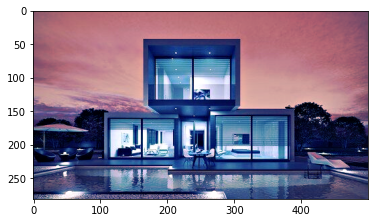

In [ ]:
import skimage
from skimage import io, filters
import numpy as np
original_image = im
original_image = skimage.util.img_as_float(original_image)
def split_image_into_channels(image):
    """Look at each image separately"""
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    return red_channel, green_channel, blue_channel

def merge_channels(red, green, blue):
    """Merge channels back into an image"""
    return np.stack([red, green, blue], axis=2)

r, g, b = split_image_into_channels(original_image)
im = merge_channels(r, g, b)

def sharpen(image, a, b):
    """Sharpening an image: Blur and then subtract from original"""
    blurred = skimage.filters.gaussian(image, sigma=10, multichannel=True)
    sharper = np.clip(image * a - blurred * b, 0, 1.0)
    return sharper

def channel_adjust(channel, values):
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(flat_channel, np.linspace(0, 1, len(values)), values)
    return adjusted.reshape(orig_size)

# 1. Colour channel adjustment example
r, g, b = split_image_into_channels(original_image)
r_interp = channel_adjust(r, [0, 0.8, 1.0])
red_channel_adj = merge_channels(r_interp, g, b)

# 2. Mid tone colour boost
r, g, b = split_image_into_channels(original_image)
r_boost_lower = channel_adjust(r, [0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
r_boost_img = merge_channels(r_boost_lower, g, b)

# 3. Making the blacks bluer
bluer_blacks = merge_channels(r_boost_lower, g, np.clip(b + 0.03, 0, 1.0))

# 4. Sharpening the image
sharper = sharpen(bluer_blacks, 1.3, 0.3)

# 5. Blue channel boost in lower-mids, decrease in upper-mids
r, g, b = split_image_into_channels(sharper)
b_adjusted = channel_adjust(b, [0, 0.047, 0.118, 0.251, 0.318, 0.392, 0.42, 0.439, 0.475, 0.561, 0.58, 0.627, 0.671, 0.733, 0.847, 0.925, 1])
gotham = merge_channels(r, g, b_adjusted)

plt.imshow(gotham)
plt.show()

### **Lily Filter**

In [ ]:
def Lily_filter(img):
    red   = img[:, :, 0]
    green = img[:, :, 1]
    blue  = img[:, :, 2]
    print(blue)
    new_blue  = (blue  ** 1) * 255
    new_green = (green  ** 0.5) * 255
    new_red  = (red ** 1) * 255
    print(new_blue)
    new_blue = np.uint8(new_blue)
    new_green = np.uint8(new_green)
    new_red = np.uint8(new_red)
    print(new_blue)
    new_img = cv2.merge((new_red,new_green,new_blue))
    plt.imshow(new_img)

[[0.36078431 0.35686275 0.35686275 ... 0.31372549 0.31372549 0.31372549]
 [0.35294118 0.35294118 0.34901961 ... 0.31372549 0.31372549 0.31372549]
 [0.34509804 0.34509804 0.34509804 ... 0.31372549 0.31372549 0.31372549]
 ...
 [0.30588235 0.41960784 0.48235294 ... 0.32156863 0.32941176 0.32941176]
 [0.53333333 0.44705882 0.45490196 ... 0.31764706 0.32941176 0.32941176]
 [0.48627451 0.49803922 0.36862745 ... 0.30196078 0.30588235 0.30980392]]
[[ 92.  91.  91. ...  80.  80.  80.]
 [ 90.  90.  89. ...  80.  80.  80.]
 [ 88.  88.  88. ...  80.  80.  80.]
 ...
 [ 78. 107. 123. ...  82.  84.  84.]
 [136. 114. 116. ...  81.  84.  84.]
 [124. 127.  94. ...  77.  78.  79.]]
[[ 92  91  91 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 88  88  88 ...  80  80  80]
 ...
 [ 78 107 123 ...  81  84  84]
 [136 113 116 ...  81  84  84]
 [124 127  94 ...  77  78  79]]


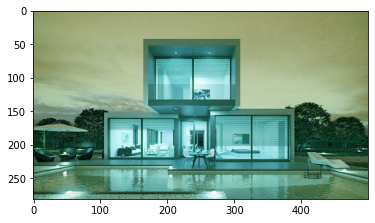

In [ ]:
Lily_filter(im)

### **1977 Filter**

In [ ]:
def _1977_filter(img):

    red   = img[:, :, 0]
    green = img[:, :, 1]
    blue  = img[:, :, 2]
    
    
    new_blue  = (blue ** 0.7 ) * 255
    new_green = (green ** 0.8 ) * 255
    new_red  = (red ** 0.4 ) * 255

    new_blue = np.uint8(new_blue)
    new_green = np.uint8(new_green)
    new_red = np.uint8(new_red)


    new_img = cv2.merge((new_red,new_green,new_blue))

    plt.imshow(new_img)

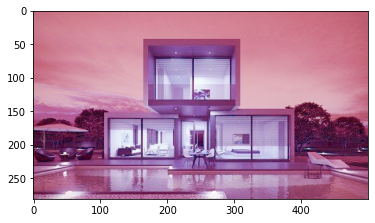

In [ ]:
_1977_filter(im)

### **Walden Filter**

In [ ]:
def Walden_filter(img):

    red   = img[:, :, 0]
    green = img[:, :, 1]
    blue  = img[:, :, 2]
    
    
    new_blue  = (blue ** 0.5 ) * 255
    new_green = (green ** 0.7 ) * 255
    new_red  = (red ** 0.7 ) * 255

    new_blue = np.uint8(new_blue)
    new_green = np.uint8(new_green)
    new_red = np.uint8(new_red)


    new_img = cv2.merge((new_red,new_green,new_blue))

    plt.imshow(new_img)

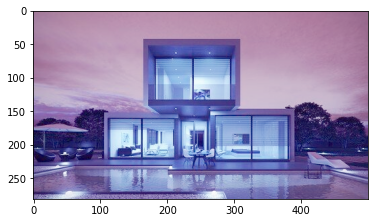

In [ ]:
Walden_filter(im)

### **Sierra Filter** - Oil Painting effect

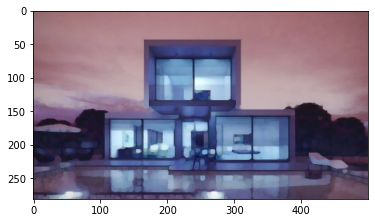

In [49]:
import cv2
import numpy as np

# load image
#img = cv2.imread("windmill.jpg")

# apply morphology open to smooth the outline
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
morph = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)

# brighten dark regions
result = cv2.normalize(morph,None,20,255,cv2.NORM_MINMAX)

# write result to disk
#cv2.imwrite("windmill_oilpaint.jpg", result)

#cv2.imshow("IMAGE", img)
#cv2.imshow("OPEN", morph)
plt.imshow(result)
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()



### **Last 3 are Done via Pilgram library in Python**

In [51]:
!pip install pillow pilgram

     |████████████████████████████████| 808kB 5.2MB/s 


### **Valencia Filter**

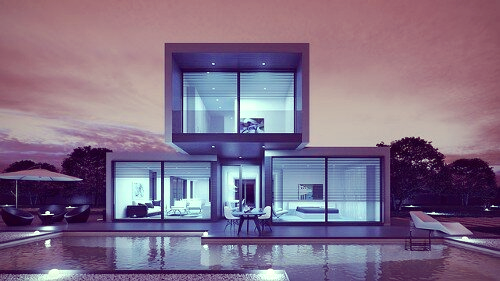

In [60]:
from PIL import Image
import pilgram
img = Image.fromarray(im, 'RGB')
#im = Image.open('sample.jpg')
pilgram.valencia(img)

### **Gingham Filter**

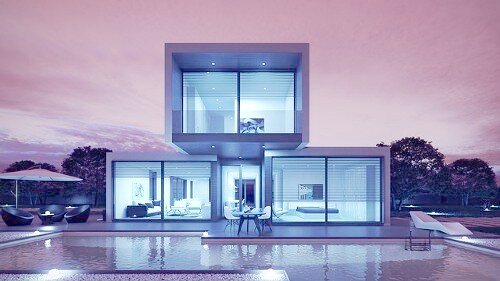

In [62]:
from PIL import Image
import pilgram
img = Image.fromarray(im, 'RGB')
#im = Image.open('sample.jpg')
pilgram.gingham(img)

### **Nashville Filter**

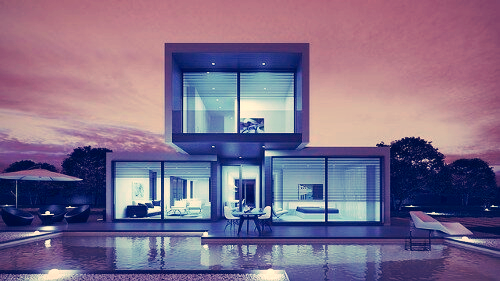

In [63]:
from PIL import Image
import pilgram
img = Image.fromarray(im, 'RGB')
#im = Image.open('sample.jpg')
pilgram.nashville(img)